# IMPORTING NECESSARY LIBRARIES

In [1]:
from flask import json
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
import pickle
from sklearn.metrics import classification_report
import requests
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import GridSearchCV

# READING THE DATASET BENGALURU.CSV.
THIS CSV FILE CONTAINS THE DATA RELATED WEATHER OF BENGALURU FROM 1990 TO 2022.THE ATTRIBUTES IN THE DATASET ARE 
1>MAXIMUM TEMPERATURE tmax
2>MINIMUM TEMPERATURE tmin
3>PRECIPITATION prcp

In [302]:
bng=pd.read_csv("C:\\Users\\Akshata Pandit\\dataset\\temp\\Temperature_And_Precipitation_Cities_IN\\bengaluru.csv", encoding='utf-8',index_col='time')

In [303]:
bng

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...
21-07-2022,23.7,20.5,30.8,82.5
22-07-2022,23.2,21.1,27.9,0.0
23-07-2022,23.1,20.9,26.7,0.0


In [304]:
bng.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

#  FORMATTING 
THE INDEX IN A COMMON ORDER OF THE DATE AND TIME

In [305]:
for fmt in ['%m-%d-%Y', '%d-%m-%Y', '%B %d, %Y']:
  try:
    bng.index = pd.to_datetime(bng.index, format=fmt)
    break
  except ValueError:
    pass


In [306]:
bng

,tavg,tmin,tmax,prcp
time,,,,
1990-01-01,22.9,19.1,28.4,NaN
1990-01-02,21.7,NaN,26.5,0.0
1990-01-03,21.0,16.4,26.5,0.0
1990-01-04,20.8,NaN,27.4,0.0
1990-01-05,20.4,14.2,26.1,0.0
...,...,...,...,...
2022-07-21,23.7,20.5,30.8,82.5
2022-07-22,23.2,21.1,27.9,0.0
2022-07-23,23.1,20.9,26.7,0.0


# DATASET CLEANING
CHECKING FOR THE NAN VALUES IN THE DATASET FOR EACH ATTRIBUTES CALCULATING SUM IS DONE BY USING ISNULL() AND SUM() FUNCTIONS
FILLING THE EMPTY VALUES BY FFILL()

In [307]:
bng.isnull().sum()

tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

In [308]:
bng=bng.ffill()
bng=bng.dropna(axis=0)
bng.isnull().sum()

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

In [309]:
bng.index.year.value_counts().sort_index()

time
1990    364
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    206
Name: count, dtype: int64

# CORRELATION BETWEEN THE ATTRIBUTES OF THE DATASET
Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. To ignore any non-numeric values, use the parameter numeric_only = True. In this article, we will learn about DataFrame.corr() method in Python.

In [310]:
bng.corr()

,tavg,tmin,tmax,prcp
tavg,1.000000,0.715097,0.870992,-0.044649
tmin,0.715097,1.000000,0.455101,0.049598
tmax,0.870992,0.455101,1.000000,-0.083889
prcp,-0.044649,0.049598,-0.083889,1.000000


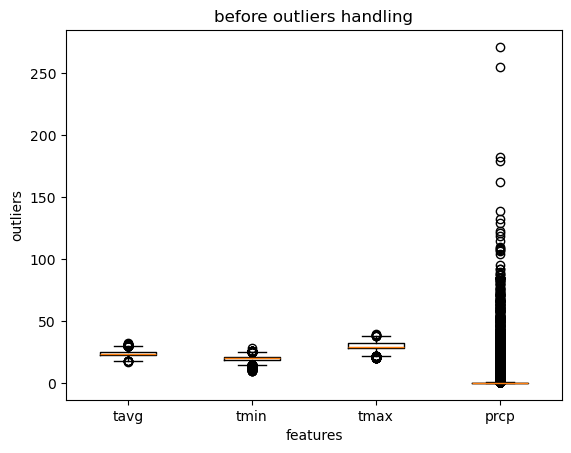

In [311]:
plt.boxplot(bng,labels=['tavg','tmin','tmax','prcp'])
plt.xlabel('features')
plt.ylabel('outliers')
plt.title("before outliers handling")
plt.show()

In [312]:
import numpy as np

def handle_outliers(data, threshold=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    data[data < lower_bound] = lower_bound  
    data[data > upper_bound] = upper_bound  
    return data



In [313]:
handle_outliers(bng['prcp'])

time
1990-01-02    0.00
1990-01-03    0.00
1990-01-04    0.00
1990-01-05    0.00
1990-01-06    0.00
              ... 
2022-07-21    0.75
2022-07-22    0.00
2022-07-23    0.00
2022-07-24    0.30
2022-07-25    0.50
Name: prcp, Length: 11893, dtype: float64

In [314]:
handle_outliers(bng['tmax'])

time
1990-01-02    26.5
1990-01-03    26.5
1990-01-04    27.4
1990-01-05    26.1
1990-01-06    24.2
              ... 
2022-07-21    30.8
2022-07-22    27.9
2022-07-23    26.7
2022-07-24    26.7
2022-07-25    28.5
Name: tmax, Length: 11893, dtype: float64

In [315]:
handle_outliers(bng['tmin'])

time
1990-01-02    19.1
1990-01-03    16.4
1990-01-04    16.4
1990-01-05    14.3
1990-01-06    17.1
              ... 
2022-07-21    20.5
2022-07-22    21.1
2022-07-23    20.9
2022-07-24    20.0
2022-07-25    20.2
Name: tmin, Length: 11893, dtype: float64

In [316]:
handle_outliers(bng['tavg'])

time
1990-01-02    21.7
1990-01-03    21.0
1990-01-04    20.8
1990-01-05    20.4
1990-01-06    20.4
              ... 
2022-07-21    23.7
2022-07-22    23.2
2022-07-23    23.1
2022-07-24    22.8
2022-07-25    24.1
Name: tavg, Length: 11893, dtype: float64

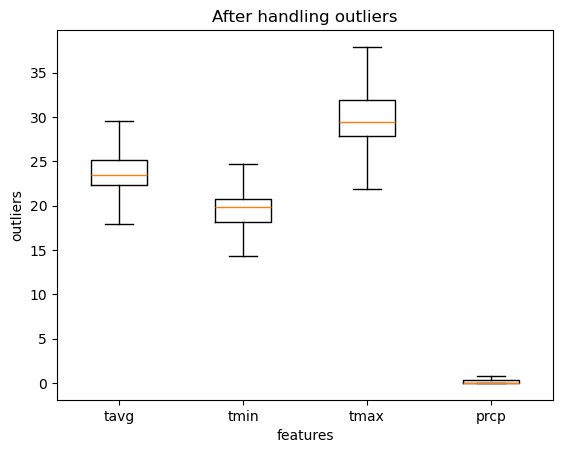

In [317]:
plt.boxplot(bng,labels=['tavg','tmin','tmax','prcp'])
plt.xlabel('features')
plt.ylabel('outliers')
plt.title('After handling outliers')
plt.show()

In [318]:
import numpy as np

def min_max_scaling(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


In [319]:
min_max_scaling(bng)

,tavg,tmin,tmax,prcp
time,,,,
1990-01-02,0.323276,0.461538,0.28750,0.000000
1990-01-03,0.262931,0.201923,0.28750,0.000000
1990-01-04,0.245690,0.201923,0.34375,0.000000
1990-01-05,0.211207,0.000000,0.26250,0.000000
1990-01-06,0.211207,0.269231,0.14375,0.000000
...,...,...,...,...
2022-07-21,0.495690,0.596154,0.55625,1.000000
2022-07-22,0.452586,0.653846,0.37500,0.000000
2022-07-23,0.443966,0.634615,0.30000,0.000000


# CATEGORIZATION OF THE DATASET
DATASET IS CLASSIFIED INTO FOLLOWING :
1>COLD MIGHT RAIN
2>MODERATE  MIGHT RAIN
3>HOT
4>MODERATE 
5>COLD

In [320]:
def categorize(data):
  data["category"]=np.nan
  prcp_=0
  high_temp=30
  low_temp=25

  categories=[]
  for index, row in data.iterrows():
    precipitation=row["prcp"]
    max_temp=row["tmax"]
    min_temp=row["tmin"]

    
    if(max_temp>high_temp):
      category="hot"
    
    elif(25<max_temp<=30):
       category="moderate"
    elif (0<min_temp<25.0):
      category="cold"
    else:
       category="moderate"
    categories.append(category)
  data["category"]=categories
  return data


# CLASSIFYING OUR DATA

In [321]:
bng=categorize(bng)

In [322]:
bng

,tavg,tmin,tmax,prcp,category
time,,,,,
1990-01-02,21.7,19.1,26.5,0.00,moderate
1990-01-03,21.0,16.4,26.5,0.00,moderate
1990-01-04,20.8,16.4,27.4,0.00,moderate
1990-01-05,20.4,14.3,26.1,0.00,moderate
1990-01-06,20.4,17.1,24.2,0.00,cold
...,...,...,...,...,...
2022-07-21,23.7,20.5,30.8,0.75,hot
2022-07-22,23.2,21.1,27.9,0.00,moderate
2022-07-23,23.1,20.9,26.7,0.00,moderate


In [323]:
s = ["tmax","prcp"]
X = bng[s]
y = bng["category"]

# SPLITTING
DATA IS SPLITTED INTO TRAIN AND TEST DATA OF TEST SIZE 0.3

In [324]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

# TARINING THE MODEL
MODEL IS TRAINED USING LOGISTIC REGRESSION MODEL.
Logistic regression is a supervised machine learning algorithm widely used for binary classification tasks, such as identifying whether an email is spam or not and diagnosing diseases by assessing the presence or absence of specific conditions based on patient test results.

In [325]:
model = LogisticRegression(max_iter=1000) 
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [326]:
try:
    model.fit(X_train, y_train)  
except ConvergenceWarning:
    print("Warning: Model might not have fully converged. Consider data preprocessing or a different solver.")
pickle.dump(model,open("model.pkl","wb"))
predictions=model.predict(X_test)
y_pred_lr=model.decision_function(X_test)

In [327]:
predictions


array(['moderate', 'moderate', 'hot', ..., 'hot', 'moderate', 'moderate'],
      dtype=object)

In [328]:
pred_prob=model.predict_proba(X_test)

In [329]:
pred_prob.shape

(3568, 3)

In [330]:
from sklearn.preprocessing import label_binarize
y_test_b=label_binarize(y_test,classes=np.unique(y_test))
classes=np.unique(y_test)

In [331]:
classes.shape[0]

3

In [332]:
y_test_b=label_binarize(y_test,classes=np.unique(y_test))
fpr={}
tpr={}
thresh={}
roc_auc=dict()
n_class=classes.shape[0]

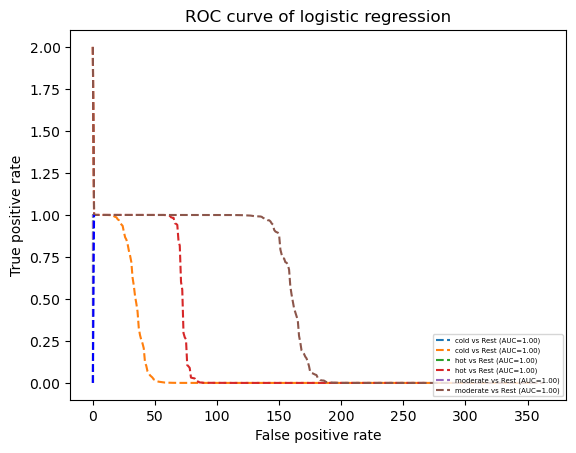

In [333]:
for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test_b[:,i],pred_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    plt.plot(fpr[i],tpr[i],thresh[i],linestyle='--',label='%s vs Rest (AUC=%0.2f)' %(classes[i],roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.title("ROC curve of logistic regression")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right',fontsize=5)
plt.show()


In [334]:
param_grid = {'C': [0.1, 1, 10]} 
grid=GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............................C=0.1;, score=0.992 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.997 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.992 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.996 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.995 total time=   0.1s
[CV 1/5] END ...............................C=1;, score=0.999 total time=   0.1s
[CV 2/5] END ...............................C=1;, score=0.999 total time=   0.1s
[CV 3/5] END ...............................C=1;, score=0.998 total time=   0.1s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.1s
[CV 5/5] END ...............................C=1;, score=0.998 total time=   0.1s
[CV 1/5] END ..............................C=10;, score=1.000 total time=   0.1s
[CV 2/5] END ..............................C=10;,

# CONFUSION MATRIX
This specific confusion matrix suggests the model performed well overall. There were significant numbers of correct predictions along the diagonal, indicating a good ability to distinguish between the four classes.


In [335]:
conf_matrix= confusion_matrix(y_test, predictions)
conf_matrix


array([[ 116,    0,    6],
       [   0, 1497,    0],
       [   0,    0, 1949]], dtype=int64)

# CLASSIFICATION REPORT
The classification report you provided indicates a perfect classification scenario for a model predicting weather conditions with four categories: cold, cold-might rain, hot, and moderate.

# ANALYSING CLASSIFICATION REPORT
Precision: This measures the proportion of positive predictions that were actually correct. In this case, for each class (cold, cold-might rain, hot, and moderate), precision is 1.00. This signifies that all the data points the model predicted as a specific weather condition (e.g., hot) truly belonged to that class. There were no false positives.

Recall: This measures the proportion of actual positive cases that were identified correctly by the model. Again, all recall values are 1.00. This means the model found all the instances of each weather condition and didn't miss any (no false negatives).

F1-Score: This is a harmonic mean of precision and recall, combining their importance into a single metric. Here, all F1-scores are 1.00, reflecting the perfect balance between precision and recall.

Support: This represents the number of true instances for each class in the test data. There were 48 cold instances, 964 cold-might-rain instances, 1236 hot instances, and 1320 moderate instances.

Accuracy: This is the overall proportion of correctly classified instances. The accuracy of 1.00 indicates the model classified all 3568 data points perfectly (all on the diagonal of the confusion matrix).

In [336]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        cold       1.00      0.95      0.97       122
         hot       1.00      1.00      1.00      1497
    moderate       1.00      1.00      1.00      1949

    accuracy                           1.00      3568
   macro avg       1.00      0.98      0.99      3568
weighted avg       1.00      1.00      1.00      3568



# TRAIN ACCURACY

In [337]:
print("train accurracy :",accuracy_score(predictions,y_test))

train accurracy : 0.9983183856502242


# TAKING INPUT
INPUT FOR THE CLASSIFYING THE CURRENT WEATHER IS  TAKEN FROM THE WEATHER API WHERE WE GET CURRENT REAL TIME DATA

In [338]:
url="https://api.weatherapi.com/v1/current.json?key=0e4c7283425846b9bad134350240606&q=bengaluru&aqi=no"

In [339]:
response=requests.get(url)

In [340]:
if response.status_code==200:
  weather_data=response.json()

  temperature=weather_data["current"]["temp_c"]
  precipitation = weather_data["current"]["precip_in"]
else:
  print(f"Error: API request failed with status code {response.status_code}")

In [341]:
from datetime import date
now = datetime.now()

data={"tmax":temperature,
      
      "prcp":precipitation}

# PREDICTING THE CURRENT WEATHER

In [342]:
bng1=pd.DataFrame(data,index=[0])
pre=model.predict(bng1)

In [343]:
pre

array(['cold'], dtype=object)

In [344]:
print("\ndate and time:",now,"\ntemperature:",data["tmax"],"degree celsius", "\nprecipitation:",data["prcp"],"\nweather prediction",pre)


date and time: 2024-08-06 20:48:31.732881 
temperature: 23.1 degree celsius 
precipitation: 0.01 
weather prediction ['cold']


# RANDOM FOREST CLASSIFICATION
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeRegressor. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.


In [364]:
modell=RandomForestClassifier()

In [365]:
modell.fit(X_test,y_test)

RandomForestClassifier()

In [366]:
predictionss=modell.predict(X_test)
pred_prob1=modell.predict_proba(X_test)

In [367]:
predictionss

array(['moderate', 'moderate', 'hot', ..., 'moderate', 'moderate',
       'moderate'], dtype=object)

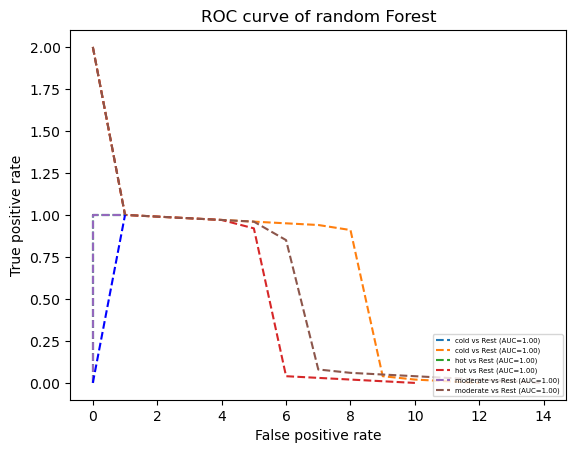

In [368]:
for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test_b[:,i],pred_prob1[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    plt.plot(fpr[i],tpr[i],thresh[i],linestyle='--',label='%s vs Rest (AUC=%0.2f)' %(classes[i],roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.title("ROC curve of random Forest")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right',fontsize=5)
plt.show()

In [350]:
confusion=confusion_matrix(y_test,predictionss)

# CONFUSION MATRIX
High numbers of correct predictions are present along the diagonal, indicating a strong ability to distinguish between the four classes.
Zeros off the diagonal imply no misclassifications occurred, meaning the model perfectly separated the data points into their intended categories.



In [351]:
confusion

array([[ 122,    0,    0],
       [   0, 1497,    0],
       [   0,    0, 1949]], dtype=int64)

# CLASSIFICATION REPORT
Precision: This measures the proportion of positive predictions that were actually correct. In this case, for each class (cold, cold-might rain, hot, and moderate), precision is 1.00. This signifies that all the data points the model predicted as a specific weather condition (e.g., hot) truly belonged to that class. There were no false positives.

Recall: This measures the proportion of actual positive cases that were identified correctly by the model. Again, all recall values are 1.00. This means the model found all the instances of each weather condition and didn't miss any (no false negatives).

F1-Score: This is a harmonic mean of precision and recall, combining their importance into a single metric. Here, all F1-scores are 1.00, reflecting the perfect balance between precision and recall.

Support: This represents the number of true instances for each class in the test data. There were 48 cold instances, 964 cold-might-rain instances, 1236 hot instances, and 1320 moderate instances.

Accuracy: This is the overall proportion of correctly classified instances. The accuracy of 1.00 indicates the model classified all 3568 data points perfectly (all on the diagonal of the confusion matrix).

Macro Avg & Weighted Avg: These are additional ways to calculate average precision, recall, and F1-score. In this case, since all individual class scores are perfect (1.00), both macro and weighted averages are also 1.00.


In [352]:
print(classification_report(y_test,predictionss))

              precision    recall  f1-score   support

        cold       1.00      1.00      1.00       122
         hot       1.00      1.00      1.00      1497
    moderate       1.00      1.00      1.00      1949

    accuracy                           1.00      3568
   macro avg       1.00      1.00      1.00      3568
weighted avg       1.00      1.00      1.00      3568



# TRAIN ACCURACY

In [353]:
print("train accurracy :",accuracy_score(predictionss,y_test))

train accurracy : 1.0


# svc model
SVC (Support Vector Classifier): SVC is a specific implementation of the Support Vector Machine algorithm that is designed specifically for classification tasks. In other words, SVC is an SVM used for classification. It seeks to find the hyperplane that best separates the data points into different classes


In [354]:
modelll = SVC(kernel='linear', random_state=42)
modelll.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [355]:
modelll.predict(X_test)

array(['moderate', 'moderate', 'hot', ..., 'hot', 'moderate', 'moderate'],
      dtype=object)

In [356]:
predictionsss=modelll.predict(X_test)

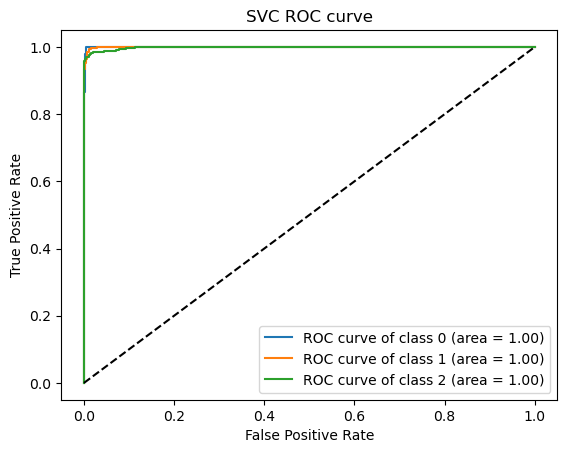

In [362]:
from sklearn.multiclass import OneVsRestClassifier
fpr={}
tpr={}
thresh={}
roc_auc=dict()

svc=SVC(probability=True)
clf=OneVsRestClassifier(svc)
clf.fit(X_train,y_train)

y_score=clf.predict_proba(X_test)
y_test_b=label_binarize(y_test, classes=clf.classes_)
n_classes=classes.shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC curve')
plt.legend(loc="lower right")
plt.show() 

# CONFUSION MATRIX
This confusion matrix suggests the model performed well overall, with an accuracy of 99.02%. Here's why:

High numbers of correct predictions are present along the diagonal, indicating a strong ability to distinguish between the four classes.
The off-diagonal values are relatively low, signifying a minimal number of misclassifications.


In [358]:
print(confusion_matrix(y_test,predictionsss))

[[ 122    0    0]
 [   0 1468   29]
 [   0    0 1949]]


# CLASSIFICATION REPORT
Precision: This measures the proportion of positive predictions that were actually correct.

For example, precision for "cold" is 0.98. This means that out of all data points the model predicted as "cold," 98% were truly cold.
Recall: This measures the proportion of actual positive cases that were identified correctly by the model.

For example, recall for "cold-might rain" is 0.99. This means that out of all data points that were actually "cold-might rain," the model correctly identified 99%.
F1-Score: This is a harmonic mean of precision and recall, combining their importance into a single metric. A value closer to 1 indicates a better balance between precision and recall.

All F1-scores here are around 0.99, suggesting a good balance between the two metrics.
Support: This represents the number of true instances for each class in the test data. There were 48 cold instances, 964 cold-might-rain instances, 1236 hot instances, and 1320 moderate instances.

Accuracy: This is the overall proportion of correctly classified instances (99% in this case).

Macro Avg & Weighted Avg: These are additional ways to calculate average precision, recall, and F1-score.

Macro average considers the average performance across all classes, giving equal weight to each class regardless of its number of instances.
Weighted average considers the number of instances in each class, giving more weight to classes with more data points.

In [359]:
print(classification_report(y_test,predictionsss))

              precision    recall  f1-score   support

        cold       1.00      1.00      1.00       122
         hot       1.00      0.98      0.99      1497
    moderate       0.99      1.00      0.99      1949

    accuracy                           0.99      3568
   macro avg       1.00      0.99      0.99      3568
weighted avg       0.99      0.99      0.99      3568



# TRAIN ACCURACY

The training accuracy of 0.9901 indicates that your machine learning model performed very well on the training data

In [360]:
print("train accurracy :",accuracy_score(predictionsss,y_test))

train accurracy : 0.991872197309417


In [361]:
X=bng.drop('category', axis=1).values
y=bng['category'].values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.995 total time=   0.2s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.998 total time=   0.2s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.994 total time=   0.2s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.998 total time=   0.2s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.998 total time=   0.2s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.925 total time=   2.2s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.930 total time=   2.2s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.928 total time=   2.2s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.937 total time=   2.2s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.934 total time=   2.8s
[CV 1/5] END ................C=1, kernel=linear;, score=0.996 total time=   0.2s
[CV 2/5] END ................C=1, kernel=linear;,